# Question 2

### I. Implement a L-Fold Cross Validation (CV) function for the KNN regressor

In [8]:
# KNN regressor from question 1

### KNN Classifier

knn <- function(train.data, train.label, test.data, K=4){
    
    # create a empty vector to hold the result
    result = c()
    
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= 'euclidean'))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ### calculate regressed value
       result[i]<- mean(train.label[nn,])
    }
    
    ## return regressed value
    return (result)
}

#### Load training data

In [9]:
# load training data into dataframe
train <- read.csv(file="Task1A_train.csv", header=TRUE, sep=",")
# shuffle the data before doing the cross validation
train <- train[sample(1:nrow(train),nrow(train)),]
# Seperate predictors and target variables for training and test set
train.data <- train[,-2, drop = FALSE]
train.label <- train[,2, drop = FALSE]

#### Cross-validation function

The cut function is used to split the training set into different partitions

In [10]:
# function to calculate the mean error for each fold
cv <- function(train.data, train.label, K, numFold = 10){
    # empty vector to store result
    error <- data.frame('Fold'=1:numFold, 'Error'= rep(0, numFold))
    # seperate the training set into K fold
    folds <- cut(seq(1,nrow(train.data)),breaks= numFold,labels=FALSE)
    
    for (i in 1:numFold){
        # segment the data by fold using which function
        testing_index <- which(folds==i,arr.ind=TRUE)
        
        testing_data <- train.data[testing_index,, drop = FALSE]
        testing_label <- train.label[testing_index,, drop = FALSE]
        
        training_data <- train.data[-testing_index,, drop = FALSE]
        training_label <- train.label[-testing_index,, drop = FALSE]
        
        # predict target variable for test set
        predicted_value <- knn(training_data, training_label, testing_data, K)
        # store MSE for the test set
        error[i,'Fold'] <-i
        error[i,'Error'] <-mean(((testing_label - predicted_value)^2)[['y']])
    }
    
    return(error)
}

Sample output of the CV function

In [11]:
cv(train.data, train.label, 4, numFold = 10)

Fold,Error
1,0.13923250
2,0.07294375
3,0.17655469
4,2.44639375
5,0.14217344
6,0.01990937
7,1.31606563
8,0.01239531
9,0.06972031
10,0.14137250


In [12]:
mean(cv(train.data, train.label, 4, numFold = 10)[['Error']])

[1] 0.4536761

### II. Run 10-Fold CV for K=1,...,15. For each K, compute the average 10 errors. Plot the average error numbers vs 1/K. 

In [13]:
avg_error <- data.frame('K'=1:15, 'Average error'= rep(0, 15))

for (i in 1:15){
    avg_error[i,'Average.error'] <- mean(cv(train.data, train.label, i, numFold = 10)[['Error']])
}
avg_error

K,Average.error
1,0.5454305
2,0.2370861
3,0.3579676
4,0.4536761
5,0.8585599
6,1.2011599
7,1.6014231
8,1.9070696
9,2.3890930
10,2.6826888


Saving 6.67 x 6.67 in image


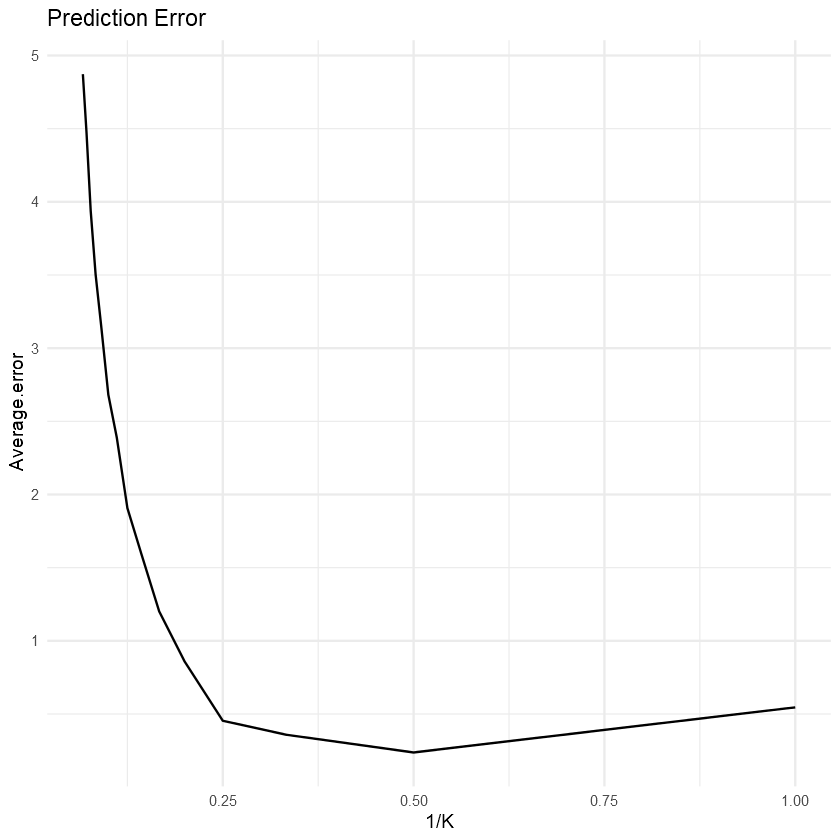

In [14]:
# import library
library(ggplot2)

# plot the prediction error for cross validation
ggplot(data=avg_error, aes(x=1/K, y=Average.error)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Prediction Error")
ggsave('Q2_plot.jpg')

### III. Report the optimum value for K based on the plot for this 10-fold cross validation.

The optimum value for K is 2 (1/k = 0.5) which results in the lowest testing error.